<a href="https://colab.research.google.com/github/kc2209/Machine_Learning/blob/main/Facebook_live_sellers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

#Reading the dataset

In [ ]:
df =pd.read_csv("Facebook_Marketplace_data.csv")

In [ ]:
print(df.isnull().sum())

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


# Data Cleaning

In [ ]:
df.drop(columns=['Column1','Column2','Column3','Column4'],inplace=True)

# Data visualization

# 1.	How does the time of upload (`status_published`)  affects the `num_reaction`?

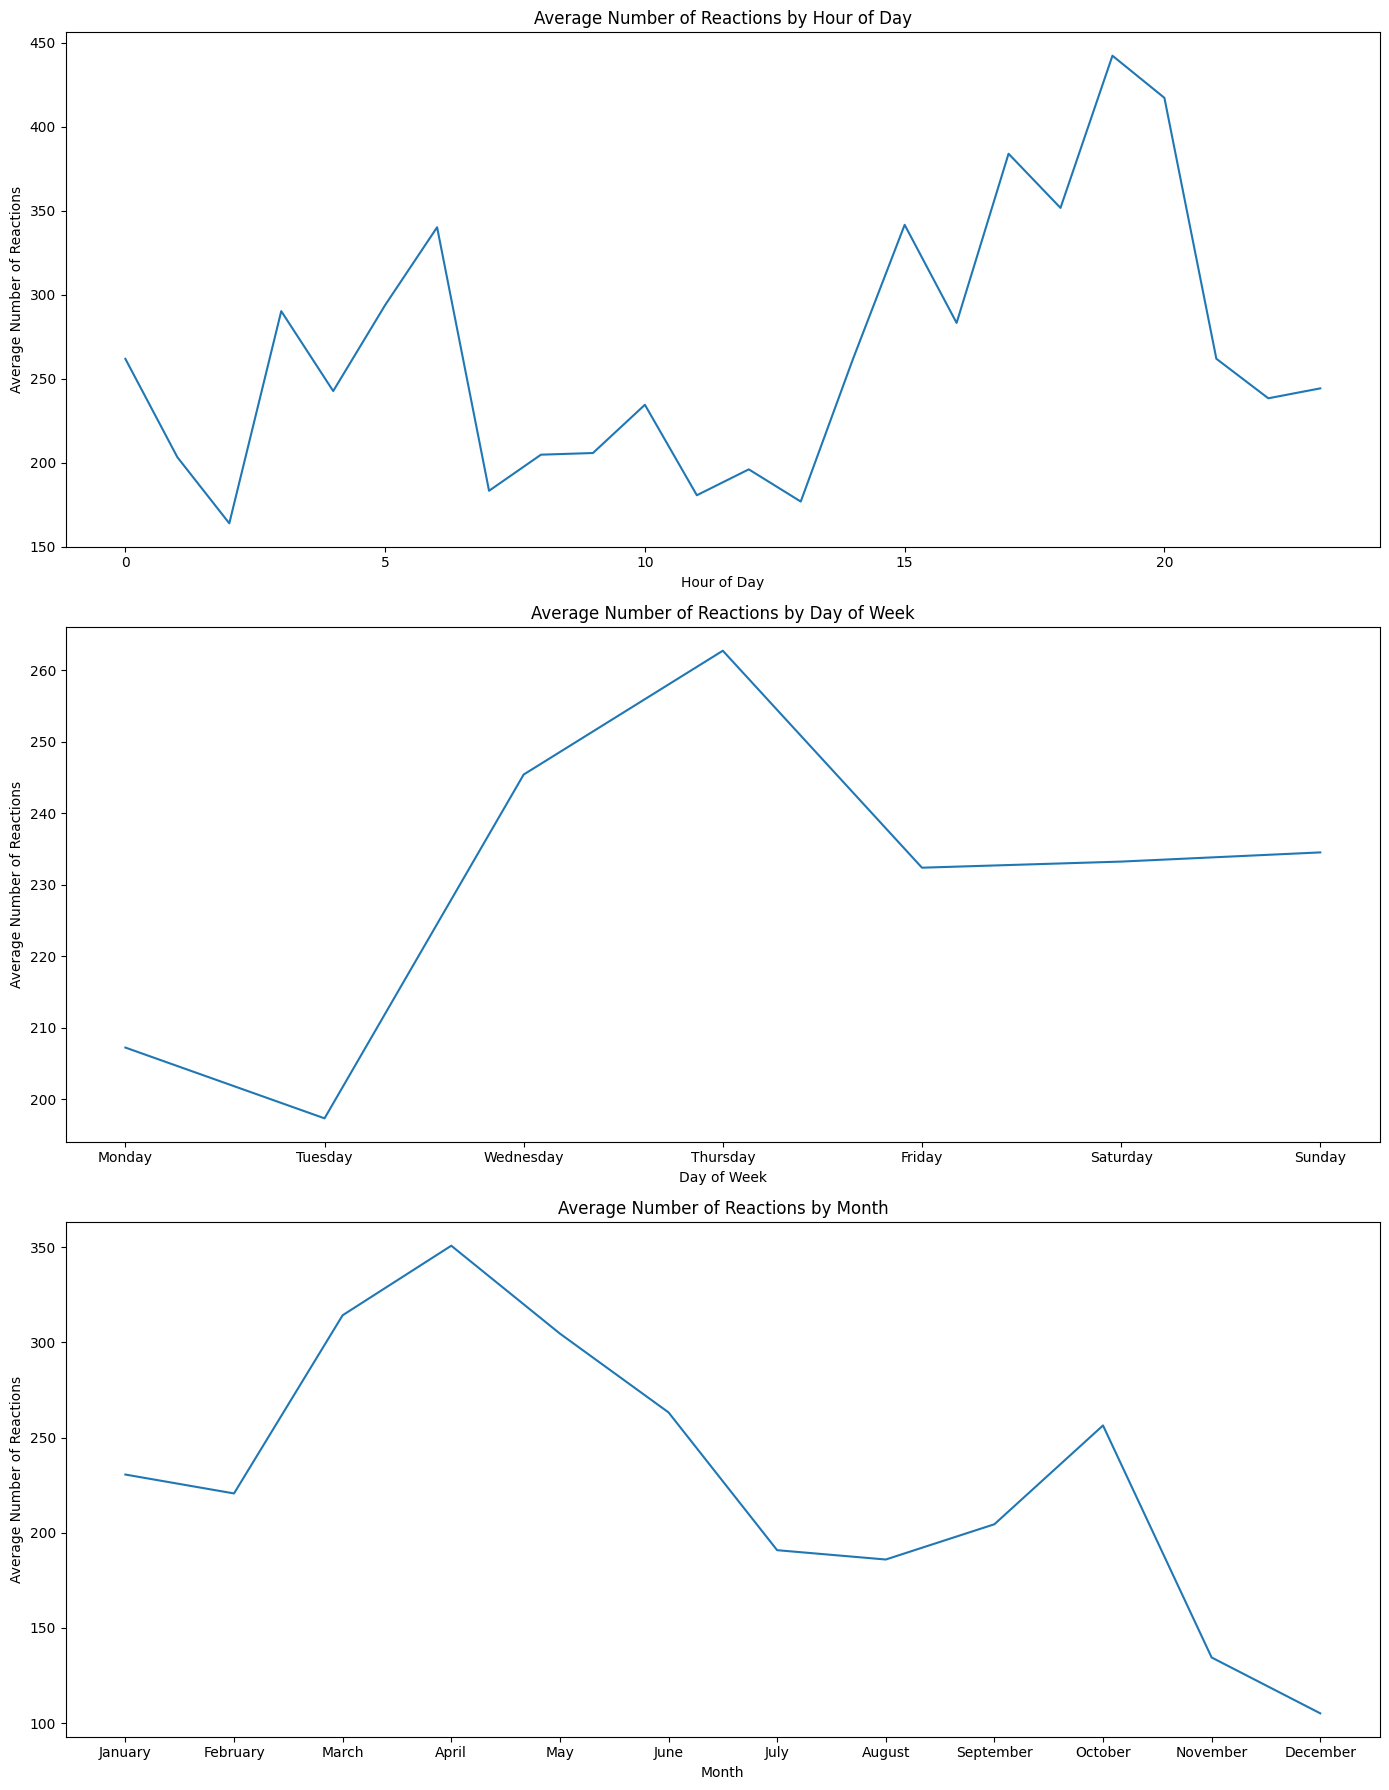

In [ ]:
df['status_published'] = pd.to_datetime(df['status_published'])
df['hour'] = df['status_published'].dt.hour
df['day_of_week'] = df['status_published'].dt.dayofweek
df['month'] = df['status_published'].dt.month
hourly_reactions = df.groupby('hour')['num_reactions'].mean()
daily_reactions = df.groupby('day_of_week')['num_reactions'].mean()
monthly_reactions = df.groupby('month')['num_reactions'].mean()


fig, ax = plt.subplots(3, 1, figsize=(14, 18))

sns.lineplot(x=hourly_reactions.index, y=hourly_reactions.values, ax=ax[0])
ax[0].set_title('Average Number of Reactions by Hour of Day')
ax[0].set_xlabel('Hour of Day')
ax[0].set_ylabel('Average Number of Reactions')

sns.lineplot(x=daily_reactions.index, y=daily_reactions.values, ax=ax[1])
ax[1].set_title('Average Number of Reactions by Day of Week')
ax[1].set_xlabel('Day of Week')
ax[1].set_ylabel('Average Number of Reactions')
ax[1].set_xticks(range(7))
ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

sns.lineplot(x=monthly_reactions.index, y=monthly_reactions.values, ax=ax[2])
ax[2].set_title('Average Number of Reactions by Month')
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Average Number of Reactions')
ax[2].set_xticks(range(1, 13))
ax[2].set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.tight_layout()
plt.show()


**Insights** :

*   The status that are uploaded at or around 19th hour of the day got high number of reactions.
*   The status that are uploaded on thursday of a week got high number of reactions.

*   The status that are uploaded in the month of april of a year got high number of reactions.





#2.	Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?

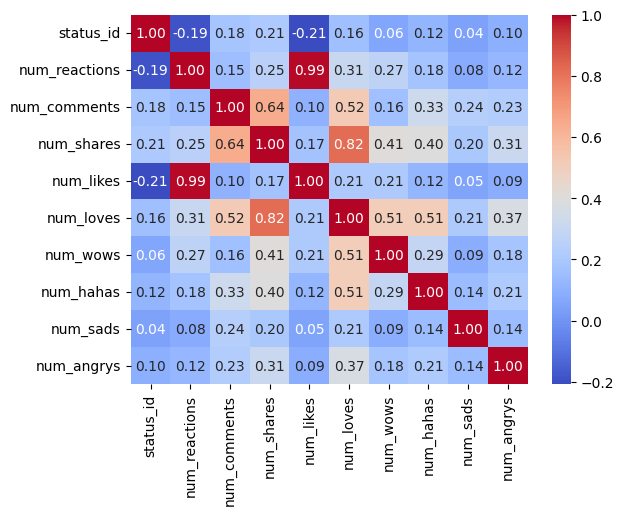

In [ ]:
df_numeric= df.select_dtypes(include=['int64','float64'])
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.show()

There is a positive correlation existing between number of reactions and number of comments and the strength of the correlation is 0.15.

There is a positive correlation existing between number of reactions and number of shares and the strength of the correlation is 0.25

#3.	Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.

In [ ]:
columns = ['status_type', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
x = df[columns]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x[:,4:] = sc.fit_transform(x[:,4:])

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

#4.	Use the elbow method to find the optimum number of clusters.

<function matplotlib.pyplot.show(close=None, block=None)>

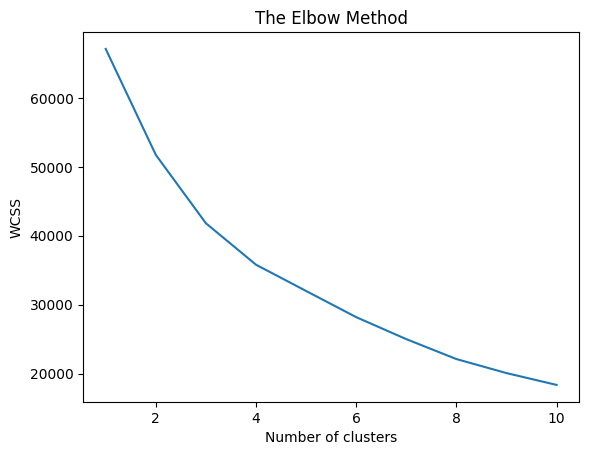

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

# 5.	What is the count of different types of posts in the dataset?

In [ ]:
print(df['status_type'].value_counts())

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


<Axes: xlabel='status_type', ylabel='count'>

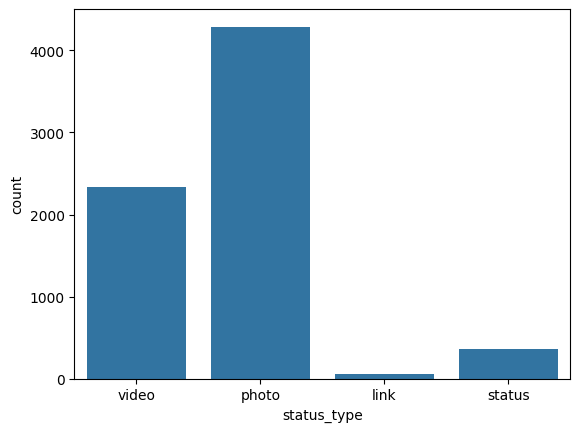

In [ ]:
sns.countplot(x='status_type', data=df)

# 6.	What is the average value of num_reaction, num_comments, num_shares for each post type?

In [ ]:
print(df['num_reactions'].mean())
print(df['num_comments'].mean())
print(df['num_shares'].mean())

230.11716312056737
224.3560283687943
40.022553191489365
